##  Pytorch实现线性回归

In [8]:
import torch
import torch.nn.functional as F

In [9]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

In [10]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_predict = F.sigmoid(self.linear(x))
        return y_predict

In [11]:
model = LogisticRegressionModel()

In [12]:
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [13]:
for i in range(1000):
    y_predict = model(x_data)
    loss = criterion(y_predict, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [15]:
print("w = ", model.linear.weight.item())
print("b = ", model.linear.bias.item())

w =  1.3285883665084839
b =  -3.205334186553955


In [16]:
x_test = torch.Tensor([4.0])
y_test = model(x_test)
print("y_test = ", y_test)

y_test =  tensor([0.8918], grad_fn=<SigmoidBackward>)


D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [18]:
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


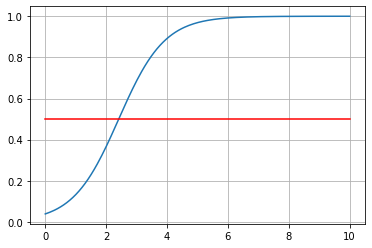

In [23]:
x = np.linspace(0, 10, 200)
x_test = torch.Tensor(x).view((200, 1))
y_test = model(x_test)
y = y_test.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c = "r")
plt.grid()
plt.show()